In [1]:
import sys
sys.path.append('../')
import time
import numpy as np

from video import Video # In your own code, change to: "from caber_image_processing import Video"

In [2]:
# Try example video fit
video_path = '../data/1wtp_2_7d7_6000fps_2.mp4'
playback_fps = 30
time_btwn_frames = 0.149*(10**(-3)) # in seconds
crop_width = 6*(10**(-3)) # in meters
vid = Video(video_path, playback_fps, poly_degree=4, pct_considered=0.4, time_btwn_frames=time_btwn_frames, width=crop_width, graph_title='Stock-PG0d4_2000fps_1.mp4')
# vid.plot_radius() # Time in ms

Compiling parameter guesses...
Finished creating guesses.
{'G': 90, 'gamma': 0.055, 'eta_S': 0.1, 'lamb': 0.1}
Fitting equation to data...
Finished fitting.
{'G': 99.88967737165808, 'gamma': 0.055466396445193765, 'eta_S': 0.09641741675096609, 'lamb': 0.10024899649639278}


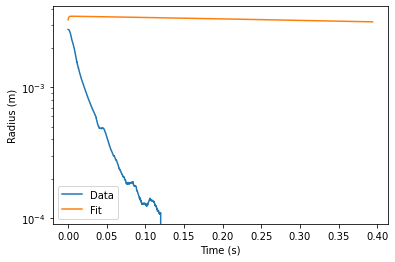

In [3]:
# Fit to Oldroyd-B model
parameter_ranges = {
    'G': (1, 100),
    'gamma': (1*10**(-3), 100*10**(-3)),
    'eta_S': (0.001, 0.2),
    'lamb': (0.001, 0.2)
}
parameter_guesses = {
    'G': 90,
    'gamma': 55*10**(-3),
    'eta_S': 0.1,
    'lamb': 0.1
}
initial_condition = np.array([0.003, 67, 0])
pct_of_data_to_use = 0.25
vid.fit('oldroyd_b', parameter_ranges, log_error=True, parameter_guesses=parameter_guesses, init_cond=initial_condition, 
        pct_data_considered=pct_of_data_to_use, time_start=0.04, time_end=0.115)
print(vid.fit_parameters)
vid.plot_fit(log=True)